In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [49]:
training_data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv", index_col="Id")
testing_data = pd.read_csv("house-prices-advanced-regression-techniques/test.csv", index_col="Id")

In [50]:
training_data.shape, testing_data.shape

((1460, 80), (1459, 79))

In [51]:
all_data = pd.concat((training_data, testing_data)).reset_index(drop=True)
display(all_data.shape, all_data.head())

(2919, 80)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [52]:
column_to_remove = list(all_data.select_dtypes(include=['category','object']))
all_data = all_data.drop(column_to_remove, axis=1)
all_data = all_data.replace({np.NaN:0})
all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000.0


# Forest regression starts here

In [53]:
training_data = all_data.iloc[:1460, :]
testing_data = all_data.iloc[-1459:, :]
display((training_data.shape, testing_data.shape), training_data.head())

((1460, 37), (1459, 37))

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [54]:
X_train, X_test = training_data.iloc[:,:-1], testing_data.iloc[:,:-1]
#X_test
y_train, y_test = training_data.iloc[:,-1:], testing_data.iloc[:,-1:]
#y_test.drop(['SalePrice'], axis=1, inplace=True)
display(X_train.head(), y_train.head())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008


,SalePrice
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0


In [73]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

C:\Users\Alexander\AppData\Local\Temp\ipykernel_17640\3799881120.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestRegressor()

In [56]:
X_train.shape, X_test.shape

((1460, 36), (1459, 36))

# Feature selection

In [57]:
sns.set_context("paper")
sns.set_style("ticks")

In [58]:
feature_names = [x for x in X.columns]
importances = forest.feature_importances_
sorted_lists = sorted(zip(importances, feature_names), reverse=True)
importances, feature_names = [[x[0] for x in sorted_lists], [x[1] for x in sorted_lists]]

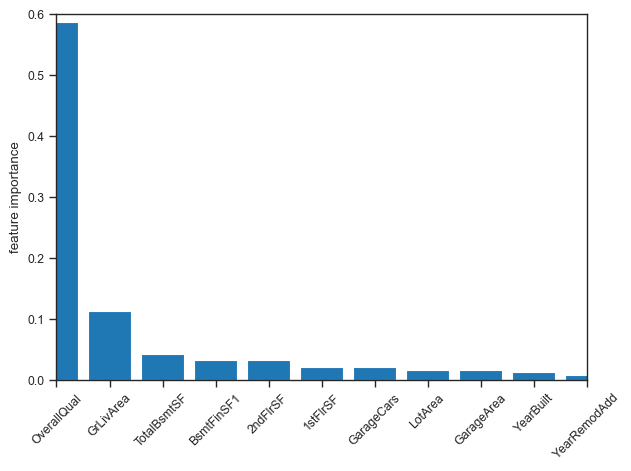

In [59]:
plt.figure()
plt.bar(feature_names, importances)
plt.xticks(rotation=45)
plt.ylabel(r"feature importance")
plt.ylim(0, 0.6)
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

# Random Forest Model Prediction for 50% of missing housing data

should we add an averaging model to this as there is some variance as high as 2% when rerunning the randomforest model


In [60]:
#ml_model = LogisticRegression(penalty)
#ml_model.fit(X_train, y_train)

In [74]:
print("model score on training data:", forest.score(X_train, y_train))
#print("model score on test data:", forest.score(X_test, y_test)) # we do not need this as we do not yet have any prices to compare the random forest model for the missing data
y_predicted = forest.predict(X_test) # This becomes our predicted prices for the missing dataset using forest prediction
y_predicted

model score on training data: 0.9808309400075984


array([126653.  , 157319.5 , 180653.24, ..., 163286.5 , 109266.03,
       229830.24])

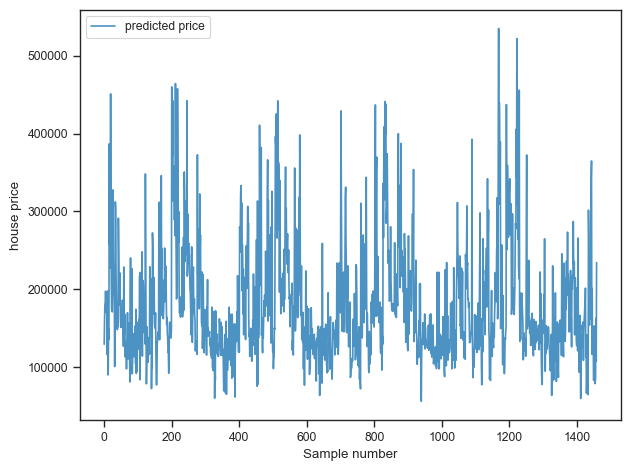

In [62]:
fig,ax = plt.subplots()
#plt.plot(y_test.to_numpy(), alpha = 0.8,label=r"observed price")
plt.plot(forest.predict(X_test), alpha=0.8, label=r"predicted price")

#always label your axes
plt.xlabel(r"Sample number")
plt.ylabel(r"house price")

# create a legend
plt.legend(loc="upper left")
#ax.xaxis.set_minor_locator(MultipleLocator(2))
#ax.yaxis.set_minor_locator(MultipleLocator(0.2))
#plt.xlim(0,100)
#plt.ylim(0.5,6)

plt.tight_layout()
#plt.savefig("House_price_regression.png", dpi=600)
#sns.despine()
plt.show()

# Reverse Forest 50:50 split to verify that the prediction is correct

In [75]:
forest = RandomForestRegressor()
forest.fit(X_test, y_predicted)

RandomForestRegressor()

In [76]:
print("model score on training data:", forest.score(X_test, y_predicted))
print("model score on test data:", forest.score(X_train, y_train))

model score on training data: 0.9971664556080814
model score on test data: 0.8567821722503417


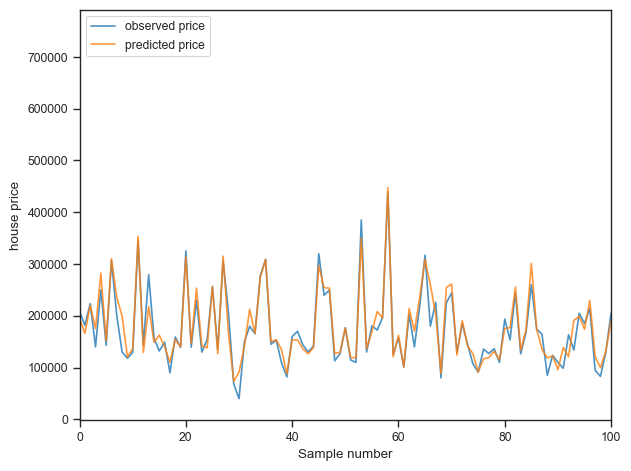

In [65]:
fig,ax = plt.subplots()
plt.plot(y_train, alpha = 0.8,label=r"observed price")
plt.plot(forest.predict(X_train), alpha=0.8, label=r"predicted price")

#always label your axes
plt.xlabel(r"Sample number")
plt.ylabel(r"house price")

# create a legend
plt.legend(loc="upper left")
#ax.xaxis.set_minor_locator(MultipleLocator(2))
#ax.yaxis.set_minor_locator(MultipleLocator(0.2))
plt.xlim(0,100)
#plt.ylim(0.5,6)
plt.tight_layout()
#plt.savefig("House_price_regression.png", dpi=600)
#sns.despine()
plt.show()

# Forest 75:25 split to verify that the prediction is valid and comparing it to the original dataset that we had (first train without test data) - Ians first part

In [66]:
#type(y_predicted)
y_predicted = pd.DataFrame(y_predicted, columns = ['SalePrice'])
y_all_data = pd.concat((y_train, y_predicted)).reset_index(drop=True)
y_all_data.shape

(2919, 1)

In [67]:
X_all_data = pd.concat((X_train, X_test)).reset_index(drop=True)
X_all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008


In [68]:
X_train75, X_test75, y_train75, y_test75 = train_test_split(X_all_data,y_all_data, random_state=1, train_size=0.75)

In [69]:
forest = RandomForestRegressor()
forest.fit(X_train75, y_train75)

C:\Users\Alexander\AppData\Local\Temp\ipykernel_17640\4114294706.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train75, y_train75)


RandomForestRegressor()

In [70]:
print("model score on training data:", forest.score(X_train75, y_train75))
print("model score on test data:", forest.score(X_test75, y_test75))

model score on training data: 0.9888839252811004
model score on test data: 0.9259663045974459


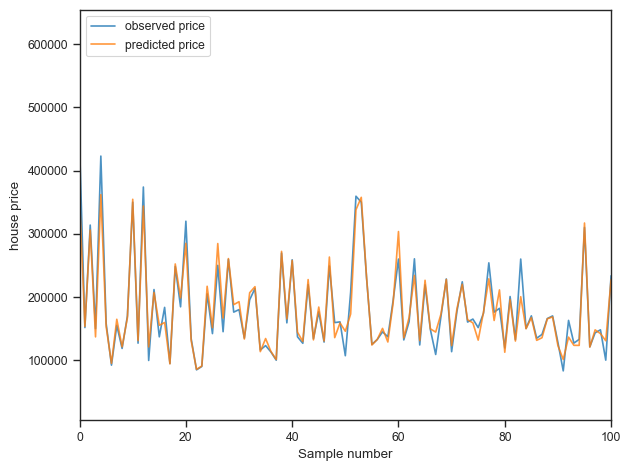

In [71]:
fig,ax = plt.subplots()
plt.plot(y_test75.to_numpy(), alpha = 0.8,label=r"observed price")
plt.plot(forest.predict(X_test75), alpha=0.8, label=r"predicted price")

#always label your axes
plt.xlabel(r"Sample number")
plt.ylabel(r"house price")

# create a legend
plt.legend(loc="upper left")
#ax.xaxis.set_minor_locator(MultipleLocator(2))
#ax.yaxis.set_minor_locator(MultipleLocator(0.2))
plt.xlim(0,100)
#plt.ylim(0.5,6)
plt.tight_layout()
#plt.savefig("House_price_regression.png", dpi=600)
#sns.despine()
plt.show()

## Correlation Graph for 75:25

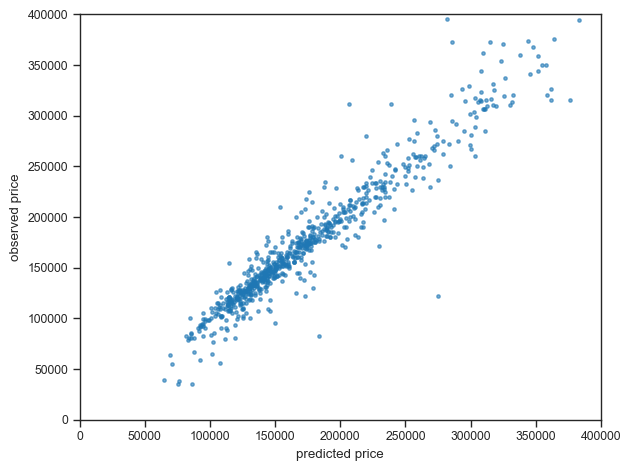

In [72]:
fig,ax = plt.subplots()
plt.plot(forest.predict(X_test75), y_test75.to_numpy(), ".", alpha=0.6)

plt.xlabel(r"predicted price")
plt.ylabel(r"observed price")

plt.xlim(0,400000)
plt.ylim(0,400000)

plt.tight_layout()
#plt.savefig("predicted_house_price_regression_correlation.png", dpi=600)
plt.show()